In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from datetime import datetime as dt
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.stattools import adfuller,acf,pacf
from statsmodels.tsa.arima_model import ARIMA,ARMA

In [2]:
data=pd.read_csv(r'C:\data set\beer.csv',index_col='Month',parse_dates=['Month'])

In [3]:
data

,Monthly beer production in Australia
Month,
1956-01-01,93.2
1956-02-01,96.0
1956-03-01,95.2
1956-04-01,77.1
1956-05-01,70.9
...,...
1995-04-01,127.0
1995-05-01,151.0
1995-06-01,130.0


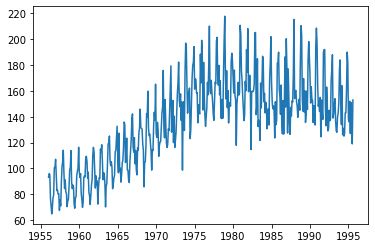

In [4]:
ts = data['Monthly beer production in Australia']
plt.plot(ts)

In [5]:
def test_stationary(timeseries):
    rollmean=timeseries.rolling(window=12,center=False).mean()
    rollstd=timeseries.rolling(window=12,center=False).std()
    #plot rolling statistics
    orig=plt.plot(timeseries,label='original',color='red')
    mean=plt.plot(rollmean,label='mean',color='black')
    std=plt.plot(rollstd,label='std',color='blue')
    plt.title('Rolling')
    plt.show()
    
    
    print('Dickey fuller test')
    dftest = adfuller(timeseries)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

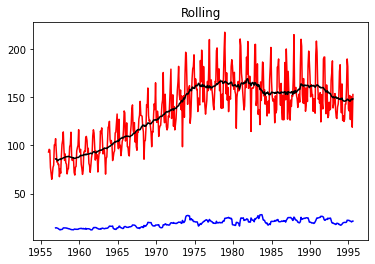

Dickey fuller test
Test Statistic                  -2.282661
p-value                          0.177621
#Lags Used                      17.000000
Number of Observations Used    458.000000
Critical Value (1%)             -3.444709
Critical Value (5%)             -2.867871
Critical Value (10%)            -2.570142
dtype: float64


In [7]:
test_stationary(ts)

### This is a non_statinary data , we have to convert into stationary

#### decomposition

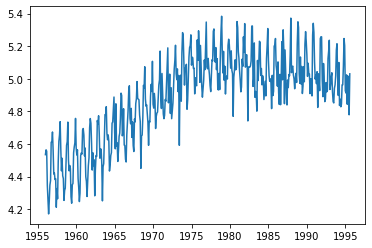

In [8]:
ts_log = np.log(ts)
plt.plot(ts_log)

### Moving average of mean and differencing...

In [9]:
moving_average = ts_log.rolling(window=12).mean()
moving_std = ts_log.rolling(window=12).std()

ts_log_diff = ts_log-moving_average
ts_log_diff.dropna(inplace=True)

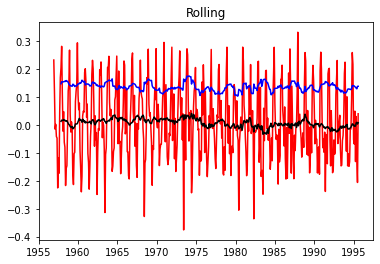

Dickey fuller test
Test Statistic                  -3.432559
p-value                          0.009898
#Lags Used                      13.000000
Number of Observations Used    451.000000
Critical Value (1%)             -3.444933
Critical Value (5%)             -2.867970
Critical Value (10%)            -2.570195
dtype: float64


In [10]:
test_stationary(ts_log_diff)

### Autocorrelation graph to find the (q) parametres MA(moving average)

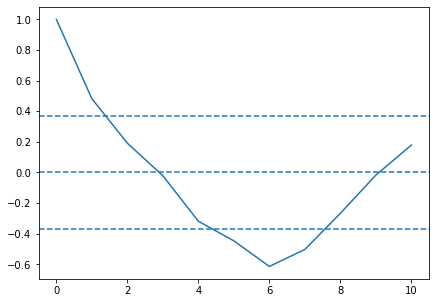

In [11]:
plt.figure(figsize=(7,5))
plt.plot(range(0,11),acf(ts_log_diff , nlags=10))
plt.axhline(y=0, linestyle='--')
plt.axhline(y=-7.96/np.sqrt(len(ts_log_diff)),linestyle='--')
plt.axhline(y=7.96/np.sqrt(len(ts_log_diff)),linestyle='--')

### partial Autocorrelation graph to find the (p) parametres for AR (auto regression)

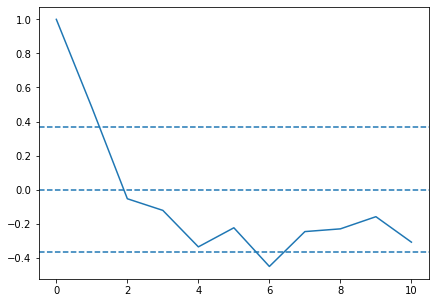

In [12]:
plt.figure(figsize=(7,5))
plt.plot(range(0,11),pacf(ts_log_diff , nlags=10))
plt.axhline(y=0, linestyle='--')
plt.axhline(y=-7.96/np.sqrt(len(ts_log_diff)),linestyle='--')
plt.axhline(y=7.96/np.sqrt(len(ts_log_diff)),linestyle='--')

### Using ARMA model to predict the data ::

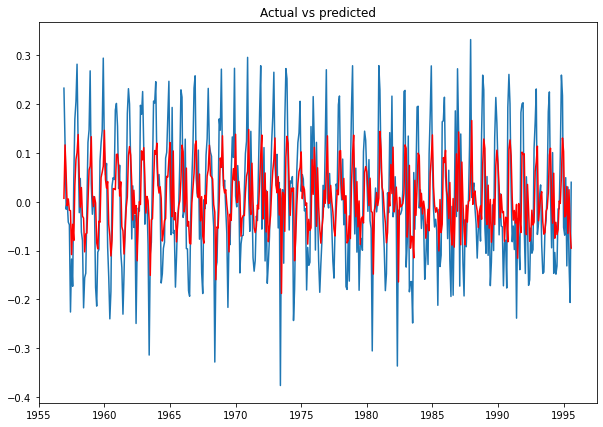

In [15]:
plt.figure(figsize=(10,7))
model = ARMA(ts_log_diff,order=(1,1)).fit()
plt.title('Actual vs predicted')
plt.plot(ts_log_diff)
plt.plot(model.fittedvalues,color='r')


In [16]:
-7.96/np.sqrt(len(ts_log_diff))

-0.36913616102509395